In [64]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plot
from matplotlib import pyplot as plt
sns.set_theme(style="darkgrid")


In [206]:
fact = pd.read_csv('tony_query_data.csv')
dim = pd.read_csv('north_items.csv')

In [218]:
df20 = pd.read_csv('2020.csv')
df21 = pd.read_csv('2021.csv')
df22 = pd.read_csv('2022.csv')

In [226]:
all = pd.concat([df20, df21, df22])

In [227]:
all.to_csv('all_years.csv',index=False)

In [221]:
df20.columns

Index(['Year', 'Month', 'Customer Key', 'Customer Number', 'Item Key',
       'Item Number', 'Shipped Qty', 'Sales Amt', 'Integrated Category',
       'Unit of Measure Id', 'UOM', 'Item Description 1',
       'Item Description 2'],
      dtype='object')

In [222]:
df21.columns

Index(['Year', 'Month', 'Customer Key', 'Customer Number', 'Item Key',
       'Item Number', 'Shipped Qty', 'Sales Amt', 'Integrated Category',
       'Unit of Measure Id', 'UOM', 'Item Description 1',
       'Item Description 2'],
      dtype='object')

In [225]:
df22.rename(columns={' Shipped Qty ':'Shipped Qty'},inplace=True)

In [223]:
df22.columns

Index(['Year', 'Month', 'Customer Key', 'Customer Number', 'Item Key',
       'Item Number', ' Shipped Qty ', 'Sales Amt', 'Integrated Category',
       'Unit of Measure Id', 'UOM', 'Item Description 1',
       'Item Description 2'],
      dtype='object')

In [224]:
df22.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8046 entries, 0 to 8045
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year                 8046 non-null   int64  
 1   Month                8046 non-null   int64  
 2   Customer Key         8046 non-null   int64  
 3   Customer Number      8046 non-null   int64  
 4   Item Key             8046 non-null   int64  
 5   Item Number          8046 non-null   object 
 6    Shipped Qty         8046 non-null   object 
 7   Sales Amt            8046 non-null   float64
 8   Integrated Category  8046 non-null   object 
 9   Unit of Measure Id   8046 non-null   object 
 10  UOM                  8046 non-null   object 
 11  Item Description 1   8046 non-null   object 
 12  Item Description 2   7681 non-null   object 
dtypes: float64(1), int64(5), object(7)
memory usage: 817.3+ KB


In [205]:
fact.shape

(945141, 14)

In [209]:
df = pd.merge(fact, dim, on=['Item Key'], how='left')

In [212]:
mid = df[df['Region']=='Mid-Atlantic']

In [214]:
mid.describe()

,Year,Month,Item Key,Shipped Qty,Sales Amt,IDW Cost,IMPUMF
count,190260.000000,190260.000000,1.902600e+05,190260.000000,1.902600e+05,1.902600e+05,0.0
mean,2020.701987,5.927589,3.804583e+06,83.691106,1.190140e+03,8.744440e+02,NaN
std,0.694155,3.499823,8.479016e+04,3591.938359,2.273074e+04,1.633869e+04,NaN
min,2020.000000,1.000000,3.708869e+06,-16000.000000,-7.865682e+04,-6.240000e+04,NaN
25%,2020.000000,3.000000,3.746717e+06,2.000000,3.318000e+01,2.660000e+01,NaN
50%,2021.000000,6.000000,3.793457e+06,5.000000,1.234800e+02,9.660000e+01,NaN
75%,2021.000000,9.000000,3.843115e+06,19.000000,4.220075e+02,3.266525e+02,NaN
max,2022.000000,12.000000,4.375767e+06,701040.000000,4.893600e+06,3.161952e+06,NaN


In [215]:
mid['Shipped Qty'].max()

701040.0

In [216]:
mid['Shipped Qty'].mean()

83.69110640702193

In [217]:
mid['Shipped Qty'].median()

5.0

In [211]:
df.to_csv('df2.csv',index=False)

In [79]:
df.head()

,Year,Month,Region,Integrated Category,Legacy L1,Legacy L2,Legacy L3,Item Key,Item Number_x,SEPG New A+ Item #,Item Description,Shipped Qty,Sales Amt,IDW Cost,Item Number_y,IUFD26,IMPUMF
0,2022,2,Central,Advertising Specialties,ADVERTISING SPECIALTIES,ASI,ASI,2672020,WBS439,NaN,Black Lanyard W/YELLOW WAXIE LOGO,0.0,0.00,0.00,WBS439,,1.0
1,2022,4,Central,Hand Hygiene,HAND HYGIENE,HAND SOAP,HAND SOAP - CARTRIDGE,2196374,073128,NaN,"SOAP,HAND,FOAM,ANTIBAC,LTX,PCMX",69.0,3329.25,2906.28,073128,,1.0
2,2022,3,Central,Printing,PRINTING,COMMERCIAL PRINT,BROCHURES-FOLDED,4359531,HY7333,NaN,DTWZR HP TDI & Safety Guidline,5.0,1040.00,580.00,HY7333,,50.0
3,2021,10,Central,Accessories,JANITORIAL SUPPLIES,DUST MOPS/DUSTERS,DUST MOP HANDLES & FRAMES,2206094,113769,NaN,"FRAME,MICROFIBER MOP,12"",TUWAY",1.0,80.36,66.29,113769,,1.0
4,2021,5,Central,Packaging,PACKAGING EQUIPMENT,STRETCH WRAPPER,PARTS,2513079,P16420,NaN,COLLECTOR RING 24 CONDUCTR S-SERIES,1.0,2541.38,2033.10,P16420,,1.0


In [80]:
df = df[['Year', 'Month','Integrated Category','Item Key', 'Item Number_x', 'Shipped Qty', 'Sales Amt','IDW Cost','IUFD26', 'IMPUMF']]

In [81]:
df.rename(columns={'Item Number_x':'Item Number'},inplace=True)

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 194119 entries, 0 to 194118
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Year                 194119 non-null  int64  
 1   Month                194119 non-null  int64  
 2   Integrated Category  194119 non-null  object 
 3   Item Key             194119 non-null  int64  
 4   Item Number          194119 non-null  object 
 5   Shipped Qty          194119 non-null  float64
 6   Sales Amt            194119 non-null  float64
 7   IDW Cost             194119 non-null  float64
 8   IUFD26               193823 non-null  object 
 9   IMPUMF               193947 non-null  float64
dtypes: float64(4), int64(3), object(3)
memory usage: 16.3+ MB


In [83]:
df['IUFD26'] = df['IUFD26'].replace(np.nan, 'NaN')
df['IUFD26'] = df['IUFD26'].replace(' ', 'NaN')
df['IMPUMF'] = df['IMPUMF'].replace(np.nan, 1)

In [84]:
df['Year'] = df['Year'].astype(str)
df['Month_int'] = df['Month']
df['Month'] = df['Month'].astype(str)

In [85]:
df['Month'] = df['Month'].replace('1','Jan')
df['Month'] = df['Month'].replace('2','Feb')
df['Month'] = df['Month'].replace('3','Mar')
df['Month'] = df['Month'].replace('4','Apr')
df['Month'] = df['Month'].replace('5','May')
df['Month'] = df['Month'].replace('6','Jun')
df['Month'] = df['Month'].replace('7','Jul')
df['Month'] = df['Month'].replace('8','Aug')
df['Month'] = df['Month'].replace('9','Sep')
df['Month'] = df['Month'].replace('10','Oct')
df['Month'] = df['Month'].replace('11','Nov')
df['Month'] = df['Month'].replace('12','Dec')

In [91]:
impumf = df[['IMPUMF']]
impumf.drop_duplicates(inplace=True)
impumf.sort_values(by='IMPUMF',ascending=False, inplace=True)

In [86]:
df['IUFD26'].value_counts()

NaN    188521
M        5480
N         104
.           3
Q           2
R           2
`           1
T           1
B           1
?           1
3           1
5           1
4           1
Name: IUFD26, dtype: int64

In [87]:
df['IUFD26'] = df['IUFD26'].map({'NaN':'NaN','M':'M','N':'N','.':'Other', 'Q':'Other','R':'Other', '`':'Other','T':'Other', 'B':'Other','?':'Other', '3':'Other','5':'Other', '4':'Other'})

In [88]:
df['IUFD26'].value_counts()

NaN      188521
M          5480
N           104
Other        14
Name: IUFD26, dtype: int64

In [133]:
df.drop(columns=['test'],inplace=True)

In [134]:
df['IMPUMF'] = df['IMPUMF'].astype(str)
df['IMPUMF'] = df['IMPUMF'].str[:-2]


In [135]:
df['IMPUMF'].value_counts(ascending=False).nlargest(20)

1       175131
25        2221
250       1892
50        1795
500       1572
100       1428
10        1360
1000      1318
2         1301
5         1035
30         710
2000       567
3          410
4          334
6          324
2500       264
12         262
20         226
5000       157
4400       146
Name: IMPUMF, dtype: int64

In [137]:
df['IMPUMF'] = df['IMPUMF'].apply(lambda x: '1' if x == '1' else ('25' if x =='25' else ('250' if x =='250' else('50' if x == '50' else ('500' if x == '500' else ('100' if x == '100' else ('10' if x =='10' else ('1000' if x == '1000' else ('2' if x == '2' else ('5' if x == '5' else 'Other'))))))))))

In [138]:
df['IMPUMF'].value_counts()

1        175131
Other      5066
25         2221
250        1892
50         1795
500        1572
100        1428
10         1360
1000       1318
2          1301
5          1035
Name: IMPUMF, dtype: int64

In [139]:
df.columns

Index(['Year', 'Month', 'Integrated Category', 'Item Key', 'Item Number',
       'Shipped Qty', 'Sales Amt', 'IDW Cost', 'IUFD26', 'IMPUMF',
       'Month_int'],
      dtype='object')

In [140]:
gp = df.groupby(['Year','Month','IUFD26','IMPUMF','Item Key','Integrated Category','IDW Cost'])['Shipped Qty','Sales Amt'].sum().reset_index()

C:\Users\djones\AppData\Local\Temp\ipykernel_30920\1385762289.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  gp = df.groupby(['Year','Month','IUFD26','IMPUMF','Item Key','Integrated Category','IDW Cost'])['Shipped Qty','Sales Amt'].sum().reset_index()


In [146]:
# plt.figure(figsize=(14,8))
# ax = sns.countplot(x='Integrated Category', hue='IMPUMF', data=gp)
# plt.xticks(rotation=45)
# ax.set_title('Integrated CategoryCount by IMPUMF', fontsize=20)
# ax.set_ylabel('Frequency', fontsize=12)

# plt.show()

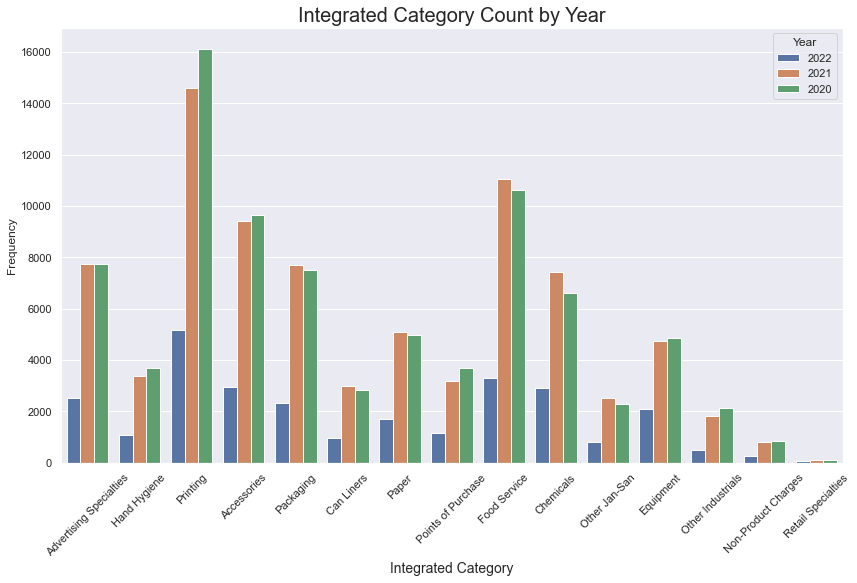

In [170]:
plt.figure(figsize=(14,8))
ax = sns.countplot(x='Integrated Category', hue='Year', data=df)
plt.xticks(rotation=45)
ax.set_title('Integrated Category Count by Year', fontsize=20)
ax.set_ylabel('Frequency', fontsize=12)
ax.set_xlabel('Integrated Category', fontsize=14)
plt.show()

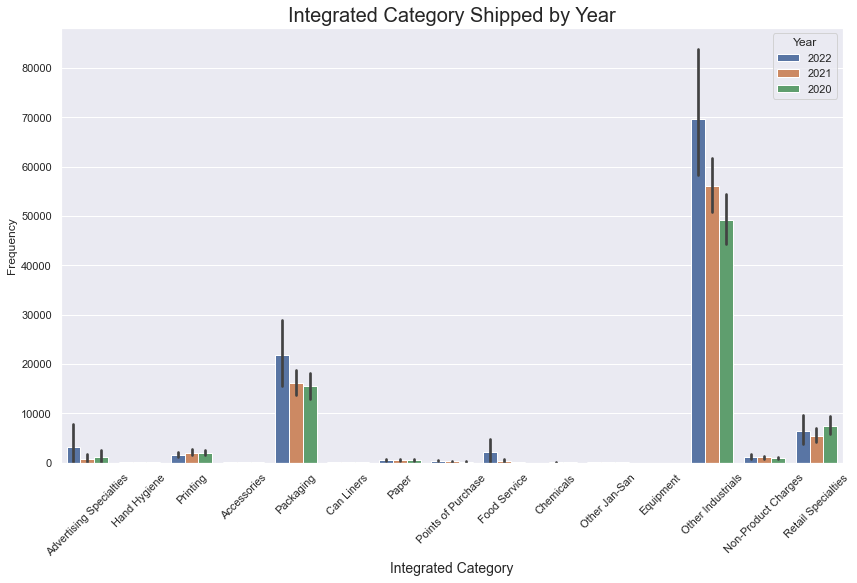

In [175]:
plt.figure(figsize=(14,8))
ax = sns.barplot(x='Integrated Category', y='Shipped Qty', hue='Year', data=df)
plt.xticks(rotation=45)
ax.set_title('Integrated Category Shipped by Year', fontsize=20)
ax.set_ylabel('Frequency', fontsize=12)
ax.set_xlabel('Integrated Category', fontsize=14)
plt.show()

In [178]:
twenty = df[df['Year']=='2020']
twenty_one = df[df['Year']=='2021']
twenty_two = df[df['Year']=='2022']

In [172]:
# plt.figure(figsize=(14,8))
# ax = sns.countplot(x='Integrated Category', hue='Year', data=gp)
# plt.xticks(rotation=45)
# ax.set_title('Integrated Category Count by Year', fontsize=20)
# ax.set_ylabel('Frequency', fontsize=12)
# ax.set_xlabel('Integrated Category', fontsize=14)
# plt.show()

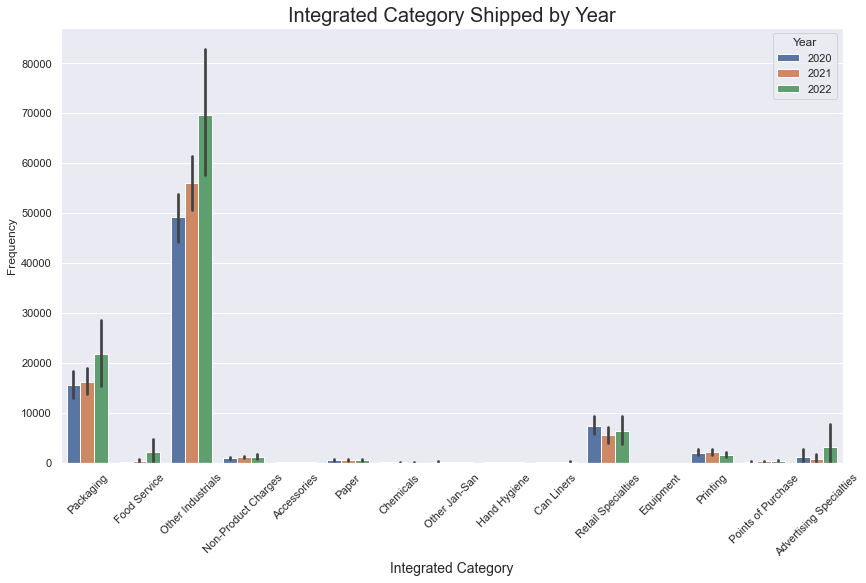

In [150]:
plt.figure(figsize=(14,8))
ax = sns.barplot(x='Integrated Category', y='Shipped Qty',hue='Year', data=gp)
plt.xticks(rotation=45)
ax.set_title('Integrated Category Shipped by Year', fontsize=20)
ax.set_ylabel('Frequency', fontsize=12)
ax.set_xlabel('Integrated Category', fontsize=14)
plt.show()

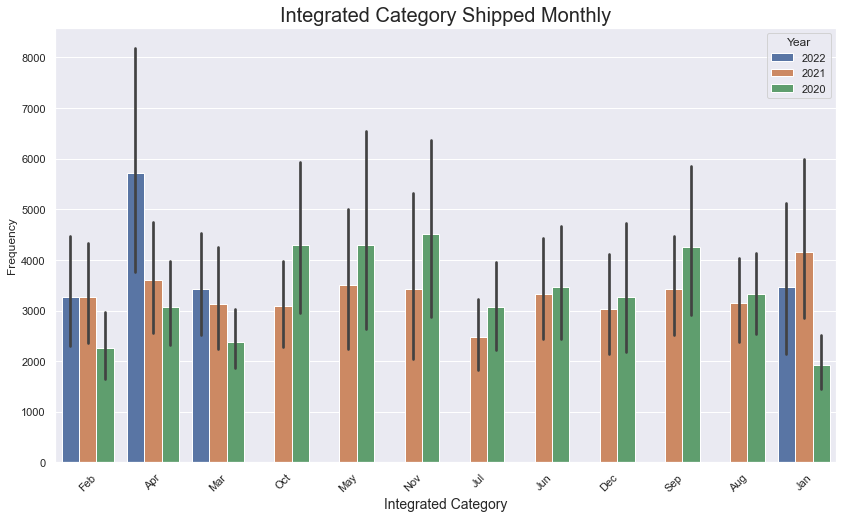

In [183]:
plt.figure(figsize=(14,8))
ax = sns.barplot(x='Month', y='Shipped Qty', hue='Year',data=df)
plt.xticks(rotation=45)
ax.set_title('Integrated Category Shipped Monthly', fontsize=20)
ax.set_ylabel('Frequency', fontsize=12)
ax.set_xlabel('Integrated Category', fontsize=14)
plt.show()

In [184]:
# Outliers 
print(df['Shipped Qty'].quantile(0.50))
print(df['Shipped Qty'].quantile(0.95))


9.0
1500.0


In [185]:
print(twenty['Shipped Qty'].quantile(0.50))
print(twenty['Shipped Qty'].quantile(0.95))

10.0
1631.8999999999942


In [186]:
print(twenty_one['Shipped Qty'].quantile(0.50))
print(twenty_one['Shipped Qty'].quantile(0.95))

9.0
1428.5


In [187]:
print(twenty_two['Shipped Qty'].quantile(0.50))
print(twenty_two['Shipped Qty'].quantile(0.95))

9.0
1492.3999999999942


In [195]:
df.describe()

,Item Key,Shipped Qty,Sales Amt,IDW Cost,Month_int
count,1.941190e+05,1.941190e+05,1.941190e+05,1.941190e+05,194119.000000
mean,2.454394e+06,3.365279e+03,4.129987e+03,3.298109e+03,5.858649
std,4.277340e+05,5.061259e+04,3.820727e+04,3.269047e+04,3.543817
min,2.147011e+06,-7.920000e+05,-4.752590e+05,-1.383900e+05,1.000000
25%,2.237992e+06,2.000000e+00,7.824000e+01,5.551000e+01,3.000000
50%,2.257543e+06,9.000000e+00,3.633100e+02,2.617800e+02,5.000000
75%,2.509942e+06,5.600000e+01,1.686055e+03,1.246685e+03,9.000000
max,4.375617e+06,5.248070e+06,2.754784e+06,2.371738e+06,12.000000


In [196]:
gp2 = df.groupby(['Year','Item Key','Integrated Category'])['Shipped Qty','Sales Amt'].sum().reset_index()

C:\Users\djones\AppData\Local\Temp\ipykernel_30920\2047188804.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  gp2 = df.groupby(['Year','Item Key','Integrated Category'])['Shipped Qty','Sales Amt'].sum().reset_index()


In [197]:
gp2.head()

,Year,Item Key,Integrated Category,Shipped Qty,Sales Amt
0,2020,2147011,Accessories,12.0,189.24
1,2020,2147017,Accessories,2.0,15.78
2,2020,2147022,Accessories,4.0,141.84
3,2020,2147025,Accessories,1.0,36.24
4,2020,2147034,Accessories,15.0,96.15


In [202]:
df.head()

,Year,Month,Integrated Category,Item Key,Item Number,Shipped Qty,Sales Amt,IDW Cost,IUFD26,IMPUMF,Month_int
0,2022,Feb,Advertising Specialties,2672020,WBS439,0.0,0.00,0.00,NaN,1,2
1,2022,Apr,Hand Hygiene,2196374,073128,69.0,3329.25,2906.28,NaN,1,4
2,2022,Mar,Printing,4359531,HY7333,5.0,1040.00,580.00,NaN,50,3
3,2021,Oct,Accessories,2206094,113769,1.0,80.36,66.29,NaN,1,10
4,2021,May,Packaging,2513079,P16420,1.0,2541.38,2033.10,NaN,1,5


In [203]:
m = df[df['IMPUMF']=='1000']

In [204]:
m.head()

,Year,Month,Integrated Category,Item Key,Item Number,Shipped Qty,Sales Amt,IDW Cost,IUFD26,IMPUMF,Month_int
21,2021,May,Printing,2662600,UX2184,4.0,312.20,213.24,NaN,1000,5
186,2020,Sep,Printing,2669445,VB0222,1.0,220.00,38.98,NaN,1000,9
747,2021,Jun,Printing,2367466,HY4673,3.0,304.47,169.23,NaN,1000,6
805,2021,Jun,Printing,2270521,AR2959,74.0,4451.84,3266.36,NaN,1000,6
960,2022,Mar,Printing,2369015,HY6222,11.0,2019.60,652.60,NaN,1000,3


<AxesSubplot:xlabel='Shipped Qty', ylabel='Sales Amt'>

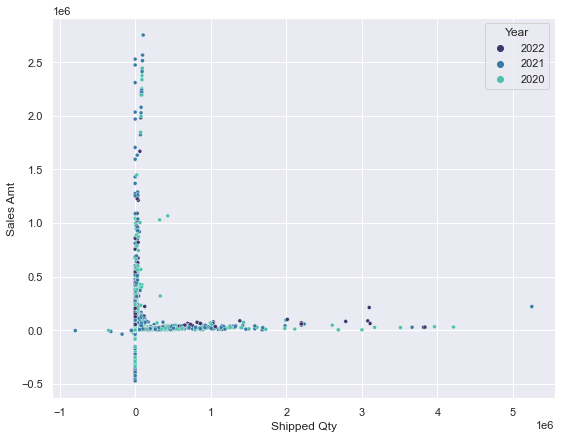

In [194]:
plt.figure(figsize=(9,7))
sns.scatterplot(y='Sales Amt', x = 'Shipped Qty', hue='Year', s=15, data=df, palette='mako')

In [157]:
gp2 = df.groupby(['Year','IUFD26','IMPUMF','Integrated Category'])['Shipped Qty','Sales Amt'].sum().reset_index()

C:\Users\djones\AppData\Local\Temp\ipykernel_30920\1695740171.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  gp2 = df.groupby(['Year','IUFD26','IMPUMF','Integrated Category'])['Shipped Qty','Sales Amt'].sum().reset_index()


In [ ]:
plt.figure(figsize=(14,8))
ax = sns.countplot(x='Integrated Category', hue='Year', data=gp)
plt.xticks(rotation=45)
ax.set_title('Integrated Category Count by Year', fontsize=20)
ax.set_ylabel('Frequency', fontsize=12)
ax.set_xlabel('Integrated Category', fontsize=14)
plt.show()


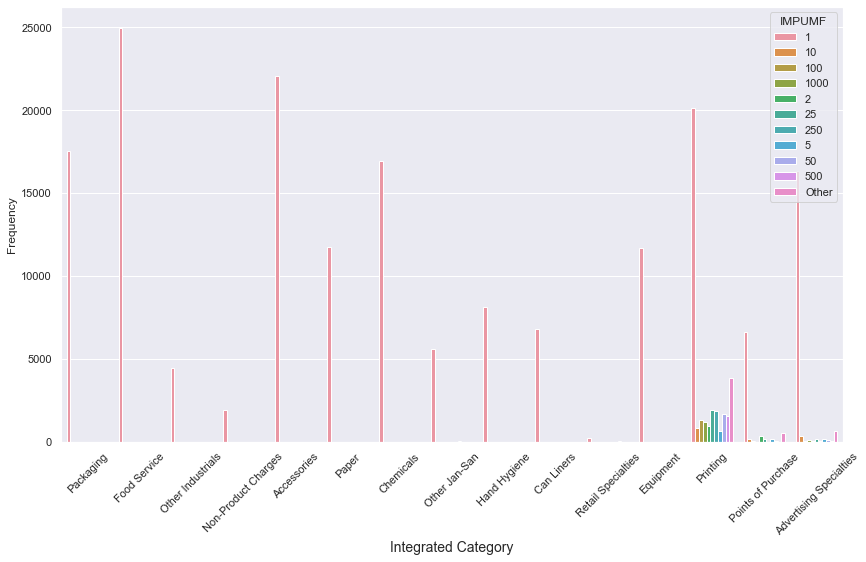

In [164]:
plt.figure(figsize=(14,8))
ax = sns.countplot(x='Integrated Category',hue='IMPUMF', data=gp)
plt.xticks(rotation=45)
#ax.set_title('Integrated Category Shipped by Year', fontsize=20)
ax.set_ylabel('Frequency', fontsize=12)
ax.set_xlabel('Integrated Category',fontsize=14)
plt.show()

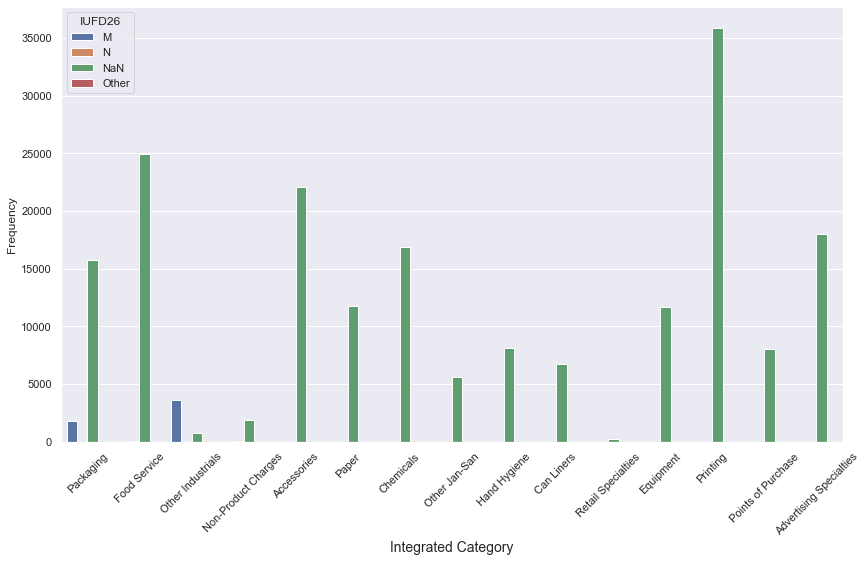

In [162]:
plt.figure(figsize=(14,8))
ax = sns.countplot(x='Integrated Category',hue='IUFD26', data=gp)
plt.xticks(rotation=45)
#ax.set_title('Integrated Category Shipped by Year', fontsize=20)
ax.set_ylabel('Frequency', fontsize=12)
ax.set_xlabel('Integrated Category',fontsize=14)
plt.show()

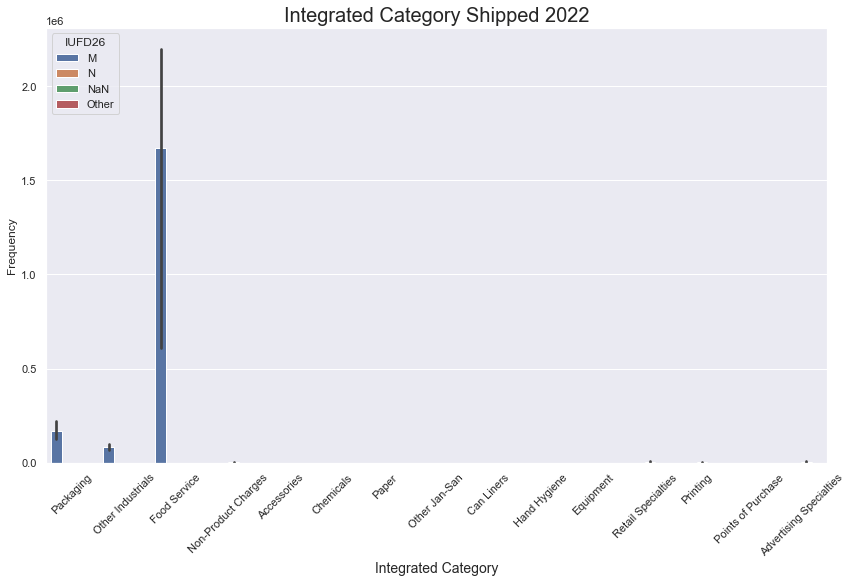

In [169]:
plt.figure(figsize=(14,8))
ax = sns.barplot(x='Integrated Category', y='Shipped Qty',hue='IUFD26', data=gp[gp['Year']=='2022'])
plt.xticks(rotation=45)
ax.set_title('Integrated Category Shipped 2022', fontsize=20)
ax.set_ylabel('Frequency', fontsize=12)
ax.set_xlabel('Integrated Category', fontsize=14)
plt.show()

In [ ]:
plt.figure(figsize=(14,8))
ax = sns.countplot(x='Integrated Category', y='Shipped Qty',hue='Year', data=gp)
plt.xticks(rotation=45)
ax.set_title('Integrated Category Shipped by Year', fontsize=20)
ax.set_ylabel('Frequency', fontsize=12)
ax.set_xlabel('Integrated Category', fontsize=14)
plt.show()

In [48]:
sf = df.groupby(['item_familygroup', 'IUFD26', 'IMPUMF'])['Shipped Qty'].sum().reset_index()


In [49]:
sf = sf.sort_values(by=['item_familygroup'], ascending=True)

In [52]:
sf.shape

(33, 4)

In [51]:
sf.head()

,item_familygroup,IUFD26,IMPUMF,Shipped Qty
0,Accessories,,1.0,1867.0
1,Amenities,,1.0,3090.0
2,Chemicals,,1.0,218881.5
3,Containers,,1.0,57613.0
4,Drinkware,,1.0,132820.0


In [19]:
family_group = df.groupby(['Family Group Name', 'IUFD26', 'IMPUMF'])['Shipped Qty'].sum().reset_index()


In [21]:
family_group1 = family_group.sort_values(by=['Shipped Qty'], ascending=False)

In [26]:
family_group2 = family_group.sort_values(by=['Family Group Name'], ascending=True)

In [27]:
family_group2.head(20)

,Family Group Name,IUFD26,IMPUMF,Shipped Qty
0,Accessories,,1.0,1982.00
1,Amenities,,1.0,2472.00
2,Chemicals,,1.0,249936.50
3,Containers,,1.0,66062.00
5,Drinkware,N,1.0,36.00
4,Drinkware,,1.0,169341.00
6,Endless Aisle,,1.0,25169.75
9,Endless Aisle,M,1.0,16024869.00
8,Endless Aisle,,1000.0,5.00
7,Endless Aisle,,6.0,15.00
